<a href="https://colab.research.google.com/github/evafiorina/evafiorina/blob/main/UTS/UTS_ML_Eva_Fiorina_Siahaan_1103210101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Nama : Eva Fiorina Siahaan

NIM : 1103210101

Kelas : ML (TK-44-G04)

Tugas UTS Machine Learning

Model : Random Forest

Dataset : https://www.kaggle.com/datasets/parisrohan/credit-score-classification

ChatGPT Prompt : https://chat.openai.com/c/dca9d088-0587-408b-80c7-cbf7ead271cf

***Connect Gdrive ke GCollab***

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Import Library***

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Membaca dataset
data_train = pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/Dataset/test.csv")

<ipython-input-56-b2a6607b19de>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")


In [39]:
print(data_train.head(5))

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [40]:
print(data_test.head(5))

       ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0      

In [41]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [42]:
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

Hapus kolom yang tidak diperlukan

In [43]:
# List nama-nama kolom yang ingin dihapus
kolom_tidak_diperlukan = ['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_History_Age', 'Type_of_Loan']

# Menghapus kolom yang tidak diperlukan
data_train_cleaned = data_train.drop(columns=kolom_tidak_diperlukan)
data_test_cleaned = data_test.drop(columns=kolom_tidak_diperlukan)

# Menampilkan data train setelah menghapus kolom
print(data_train_cleaned.head())
print(data_train_cleaned.head())

      Month   Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0   January    23  Scientist      19114.12            1824.843333   
1  February    23  Scientist      19114.12                    NaN   
2     March  -500  Scientist      19114.12                    NaN   
3     April    23  Scientist      19114.12                    NaN   
4       May    23  Scientist      19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                  3                4              3           4   
1                  3                4              3           4   
2                  3                4              3           4   
3                  3                4              3           4   
4                  3                4              3           4   

   Delay_from_due_date  ... Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                    3  ...                  4.0          _            809.98   
1             

In [44]:
# Mendeskripsikan data di dalam DataFrame
deskripsi = data_train.describe()
deskripsi = data_test.describe()

# Menampilkan ringkasan statistik deskriptif
print(deskripsi)

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           42502.000000       50000.000000     50000.000000   
mean             4182.004291          16.838260        22.921480   
std              3174.109304         116.396848       129.314804   
min               303.645417          -1.000000         0.000000   
25%              1625.188333           3.000000         4.000000   
50%              3086.305000           6.000000         5.000000   
75%              5934.189094           7.000000         7.000000   
max             15204.633333        1798.000000      1499.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count   50000.000000         50000.000000          48965.000000   
mean       68.772640            21.052640             30.080200   
std       451.602363            14.860397            196.984121   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

In [45]:
# Mencetak frekuensi kemunculan nilai dalam kolom 'Monthly_Balance' dari data train
print("Frekuensi kemunculan nilai dalam kolom 'Monthly_Balance' dari data train:")
print(data_train['Monthly_Balance'].value_counts())

# Mencetak frekuensi kemunculan nilai dalam kolom 'Monthly_Balance' dari data test
print("\nFrekuensi kemunculan nilai dalam kolom 'Monthly_Balance' dari data test:")
print(data_test['Monthly_Balance'].value_counts())

Frekuensi kemunculan nilai dalam kolom 'Monthly_Balance' dari data train:
Monthly_Balance
__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: count, Length: 98792, dtype: int64

Frekuensi kemunculan nilai dalam kolom 'Monthly_Balance' dari data test:
Monthly_Balance
__-333333333333333333333333333__    6
186.26670208571772                  1
223.40782977501067                  1
305.43786598764547                  1
389.53754307843735                  1
                                   ..
421.25686767906984                  1
194.44026842190848                  1
299.957837924029                    1
375.897928536186   

***Pre Proses***

In [46]:
# Menghapus semua underscore dari setiap elemen dalam kolom 'Monthly_Balance' dari data train
data_train['Monthly_Balance'] = data_train['Monthly_Balance'].str.replace('_', '')

# Menghapus semua underscore dari setiap elemen dalam kolom 'Monthly_Balance' dari data test
data_test['Monthly_Balance'] = data_test['Monthly_Balance'].str.replace('_', '')

# Menampilkan beberapa baris pertama data train setelah menghapus underscore
print("Data Train setelah penghapusan underscore:")
print(data_train.head())

# Menampilkan beberapa baris pertama data test setelah menghapus underscore
print("\nData Test setelah penghapusan underscore:")
print(data_test.head())

Data Train setelah penghapusan underscore:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outs

Encoding
Encoding variabel kategorikal ke dalam representasi numerik diperlukan untuk banyak algoritma Machine Learning. Teknik encoding umum meliputi one -hot encoding, label encoding dan ordinal encoding.

In [47]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengkodekan variabel kategorikal dalam data train
for column in data_train.select_dtypes(include=['object']).columns:
    data_train[column] = label_encoder.fit_transform(data_train[column])

# Mengkodekan variabel kategorikal dalam data test
for column in data_test.select_dtypes(include=['object']).columns:
    data_test[column] = label_encoder.fit_transform(data_test[column])

# Menampilkan beberapa baris pertama data train setelah encoding
print("Data Train setelah encoding:")
print(data_train.head())

# Menampilkan beberapa baris pertama data test setelah encoding
print("\nData Test setelah encoding:")
print(data_test.head())

Data Train setelah encoding:
      ID  Customer_ID  Month  Name  Age    SSN  Occupation  Annual_Income  \
0  16406        12320      3    84  308  10205          12           6011   
1  16417        12320      2    84  308  10205          12           6011   
2  16428        12320      6    84    0  10205          12           6011   
3  16441        12320      0    84  308  10205          12           6011   
4  16452        12320      7    84  308  10205          12           6011   

   Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0            1824.843333                  3  ...           3   
1                    NaN                  3  ...           1   
2                    NaN                  3  ...           1   
3                    NaN                  3  ...           1   
4            1824.843333                  3  ...           1   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0             12062                 26.822620         

In [48]:
# Menghapus baris-baris yang memiliki nilai yang hilang pada data train dan data test
data_train = data_train.dropna()
data_test = data_test.dropna()

# Menghapus nilai yang tidak valid atau negatif pada data train
data_train = data_train.applymap(lambda x: x if np.issubdtype(type(x), np.number) and x > 0 else np.nan)

# Menghapus nilai yang tidak valid atau negatif pada data test
data_test = data_test.applymap(lambda x: x if np.issubdtype(type(x), np.number) and x > 0 else np.nan)

# Menghapus baris-baris yang memiliki nilai yang hilang setelah pemeriksaan
data_train = data_train.dropna()
data_test = data_test.dropna()

# Menampilkan beberapa baris pertama data train setelah pembersihan
print("Data Train setelah pembersihan:")
print(data_train.head())

# Menampilkan beberapa baris pertama data test setelah pembersihan
print("\nData Test setelah pembersihan:")
print(data_test.head())

Data Train setelah pembersihan:
         ID  Customer_ID  Month     Name     Age     SSN  Occupation  \
8   16542.0       1066.0    3.0   7491.0   450.0    53.0        15.0   
22  16748.0       1885.0    4.0  10139.0   555.0  6099.0         4.0   
23  16759.0       1885.0    1.0   4940.0   555.0  6099.0         4.0   
25  16825.0      11310.0    2.0   3840.0  1011.0   921.0         5.0   
28  16860.0      11310.0    7.0   3840.0  1034.0   921.0         5.0   

    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
8           10300            3037.986667                2.0  ...         1.0   
22           2755           12187.220000                1.0  ...         1.0   
23           2755           12187.220000                1.0  ...         1.0   
25           9030            2612.490833                2.0  ...         1.0   
28           9030            2612.490833                2.0  ...         1.0   

    Outstanding_Debt  Credit_Utilization_Ratio  Credit

In [49]:
#menghitung kuartils
quartiles1 = data_test.quantile([0.25, 0.75])
quartiles2 = data_train.quantile([0.25, 0.75])

In [50]:
#menghitung antarkuartils
IQR1 = quartiles1.loc[0.75] - quartiles1.loc[0.25]
IQR2 = quartiles2.loc[0.75] - quartiles2.loc[0.25]

In [51]:
# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk data train
quartiles_train = data_train.quantile([0.25, 0.75])
Q1_train = quartiles_train.loc[0.25]
Q3_train = quartiles_train.loc[0.75]

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk data test
quartiles_test = data_test.quantile([0.25, 0.75])
Q1_test = quartiles_test.loc[0.25]
Q3_test = quartiles_test.loc[0.75]

# Menghitung Interquartile Range (IQR) untuk data train dan data test
IQR_train = Q3_train - Q1_train
IQR_test = Q3_test - Q1_test

# Menghitung batas bawah dan batas atas untuk deteksi outlier untuk data train dan data test
lower_bound_train = Q1_train - 1.5 * IQR_train
upper_bound_train = Q3_train + 1.5 * IQR_train

lower_bound_test = Q1_test - 1.5 * IQR_test
upper_bound_test = Q3_test + 1.5 * IQR_test

# Menampilkan batas bawah dan batas atas untuk deteksi outlier untuk data train
print("Batas bawah untuk deteksi outlier (Data Train):")
print(lower_bound_train)
print("\nBatas atas untuk deteksi outlier (Data Train):")
print(upper_bound_train)

# Menampilkan batas bawah dan batas atas untuk deteksi outlier untuk data test
print("\nBatas bawah untuk deteksi outlier (Data Test):")
print(lower_bound_test)
print("\nBatas atas untuk deteksi outlier (Data Test):")
print(upper_bound_test)

Batas bawah untuk deteksi outlier (Data Train):
ID                         -49942.000000
Customer_ID                 -6191.000000
Month                          -4.000000
Name                        -5597.000000
Age                          -237.000000
SSN                         -6386.000000
Occupation                     -8.000000
Annual_Income               -9257.875000
Monthly_Inhand_Salary       -4640.780000
Num_Bank_Accounts              -0.500000
Num_Credit_Card                -0.500000
Interest_Rate                 -10.000000
Num_of_Loan                    24.000000
Type_of_Loan                -3285.000000
Delay_from_due_date           -11.500000
Num_of_Delayed_Payment       -455.500000
Changed_Credit_Limit        -2472.000000
Num_Credit_Inquiries           -2.000000
Credit_Mix                      0.500000
Outstanding_Debt            -7264.500000
Credit_Utilization_Ratio       15.507624
Credit_History_Age           -219.000000
Payment_of_Min_Amount          -0.500000
Total_EMI

In [52]:
# Menghapus outlier dari data train
data_train_filtered = data_train[(data_train >= lower_bound_train) & (data_train <= upper_bound_train)].dropna()

# Menghapus outlier dari data test
data_test_filtered = data_test[(data_test >= lower_bound_test) & (data_test <= upper_bound_test)].dropna()

# Menampilkan beberapa baris pertama data train setelah penghapusan outlier
print("Data Train setelah penghapusan outlier:")
print(data_train_filtered.head())

# Menampilkan beberapa baris pertama data test setelah penghapusan outlier
print("\nData Test setelah penghapusan outlier:")
print(data_test_filtered.head())

Data Train setelah penghapusan outlier:
         ID  Customer_ID  Month    Name    Age     SSN  Occupation  \
57  17369.0       4483.0    2.0   711.0  475.0  6253.0        10.0   
60  17404.0       4483.0    7.0   711.0  475.0  6253.0        15.0   
63  17439.0       4483.0    1.0   711.0  475.0  6253.0        10.0   
68  17540.0       3152.0    7.0  1489.0  308.0   903.0         3.0   
71  17575.0       3152.0    1.0  1489.0  363.0   903.0         3.0   

    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
57          10055              2611.1150                8.0  ...         3.0   
60          10055              2611.1150                8.0  ...         3.0   
63          10055              2611.1150                8.0  ...         3.0   
68           1077              9843.8675                2.0  ...         1.0   
71           1077              9843.8675                2.0  ...         1.0   

    Outstanding_Debt  Credit_Utilization_Ratio  Credit_His

***Machine Learning Model***

In [53]:
# Memilih fitur-fitur yang bukan tipe data integer untuk data train
X_train = data_train.drop('Credit_Score',axis=1)
y_train = data_train['Credit_Score']

# Memilih fitur-fitur yang sama untuk data test
X_test = data_test

# Membagi data train menjadi data latih dan data validasi
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Membuat Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Membuat prediksi
y_pred_valid_rf = rf_model.predict(X_valid)

***Evaluasi MSE dan MAE***

In [54]:
# Evaluasi model
accuracy = accuracy_score(y_valid, y_pred_valid_rf)
print("Accuracy:", accuracy)

# mean squared error (MSE)
mse = mean_squared_error(y_valid, y_pred_valid_rf)
print("Mean Squared Error (MSE):", mse)

# mean absolute error (MAE)
mae = mean_absolute_error(y_valid, y_pred_valid_rf)
print("Mean Absolute Error (MAE):", mae)

Accuracy: 0.8457811869196609
Mean Squared Error (MSE): 0.1542188130803391
Mean Absolute Error (MAE): 0.1542188130803391


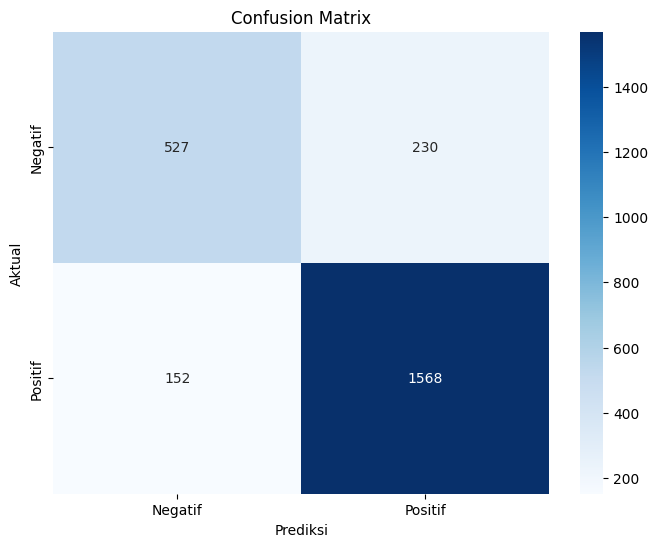

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model Random Forest
model_rf = RandomForestClassifier()

# Melatih model menggunakan data train
model_rf.fit(X_train, y_train)

# Memprediksi kelas target menggunakan data test
y_pred_rf = model_rf.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_valid, y_pred_valid_rf)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()
